# **Librerias**

In [1]:
# Importamos 

import scipy
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull, Delaunay

# Version 

print(f'Numpy Version: {np.__version__}')
print(f'Scipy Version: {scipy.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

Numpy Version: 2.0.2
Scipy Version: 1.13.1
Matplotlib Version: 3.9.4


# **Interseccion** 

Si los conjuntos $S_{1}$ y $S_{2}$ son convexos, entonces la interseccion de ellos $S_{1} \cap S_{2}$ es convexa.

**Nota:** Todo **conjunto convexo y cerrado** $S \subseteq \mathbb{R}^n$ es la interseccion de todos los **medios espacios cerrados** que lo contienen

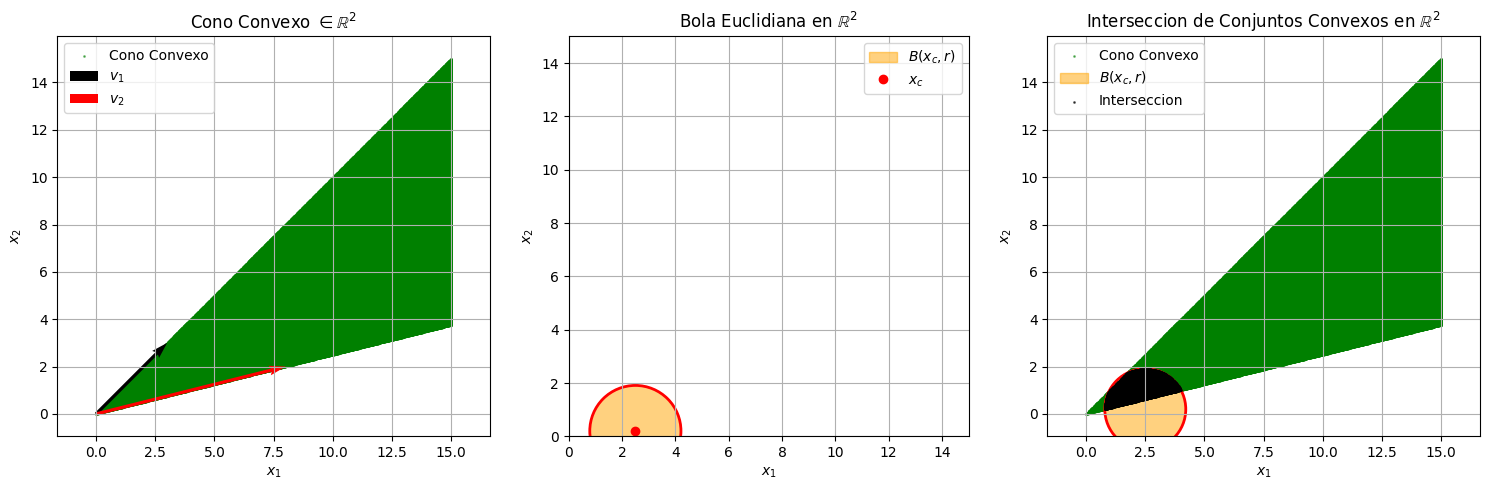

In [2]:
# Definimos los Vectores con los que construimos el conjunto de un Cono Convexo

v1 = np.array([3, 3])
v2 = np.array([8, 2])

# Definimos el Centro y el Radio de la Bola Euclidiana con los que construimos el conjunto de una Bola Euclidiana

x1 = np.random.uniform(0, 10, size = (1))[0]
x2 = np.random.uniform(0, 5, size = (1))[0]

xc = np.array([x1, x2])
r = np.random.uniform(0.1, 3, size = (1))[0]

# Defino un Dominio Comun para los dos Conjuntos

x = np.linspace(0, 15, 1000)
y = np.linspace(0, 15, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis = 1)

# Obtenemos el Dominio de la Bola Euclidiana

Z_ball = (X - xc[0])**2 + (Y - xc[1])**2 <= r**2

# Obtenemos el Dominio del Cono Convexo

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

thetas = V_inv @ XY.T

mask_cone = (thetas[0, :] >= 0) & (thetas[1, :] >= 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Interceptamos los Dominios

Z_intersection = Z_cone & Z_ball

X_intersection = X[Z_intersection]
Y_intersection = Y[Z_intersection]

# Visualizamos

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].scatter(X_cone_points, Y_cone_points, color = 'green', alpha = 0.5, s = 1, label = 'Cono Convexo')
axs[0].quiver(0, 0, v1[0], v1[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'k', label = '$v_{1}$')
axs[0].quiver(0, 0, v2[0], v2[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'r', label = '$v_{2}$')

axs[0].set_title("Cono Convexo $\in \mathbb{R}^2$")
axs[0].axis("equal")
axs[0].set_xlim(0, 15)
axs[0].set_ylim(0, 15)
axs[0].grid(True)
axs[0].set_xlabel('$x_{1}$')
axs[0].set_ylabel('$x_{2}$')
axs[0].legend()

circle = plt.Circle((xc[0], xc[1]), r, color = 'orange', alpha = 0.5, label = r'$B(x_c, r)$')
boundary = plt.Circle((xc[0], xc[1]), r, color = 'red', fill = False, linewidth = 2)

axs[1].add_patch(circle)
axs[1].add_patch(boundary)
axs[1].plot(xc[0], xc[1], 'ro', label = r'$x_c$')
axs[1].set_xlim(0, 15)
axs[1].set_ylim(0, 15)
axs[1].set_aspect('equal')
axs[1].grid(True)
axs[1].set_xlabel('$x_{1}$')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_title('Bola Euclidiana en $\mathbb{R}^2$')
axs[1].legend()

circle = plt.Circle((xc[0], xc[1]), r, color = 'orange', alpha = 0.5, label = r'$B(x_c, r)$')
boundary = plt.Circle((xc[0], xc[1]), r, color = 'red', fill = False, linewidth = 2)

axs[2].scatter(X_cone_points, Y_cone_points, color = 'green', alpha = 0.5, s = 1, label = 'Cono Convexo')
axs[2].add_patch(circle)
axs[2].add_patch(boundary)
axs[2].scatter(X_intersection, Y_intersection, color = 'black', alpha = 0.6, s = 1, label = 'Interseccion')
axs[2].set_title("Intersección")
axs[2].axis("equal")
axs[2].set_xlim(0, 15)
axs[2].set_ylim(0, 15)
axs[2].grid(True)
axs[2].set_xlabel('$x_{1}$')
axs[2].set_ylabel('$x_{2}$')
axs[2].set_title('Interseccion de Conjuntos Convexos en $\mathbb{R}^2$')
axs[2].legend()

plt.tight_layout()
plt.show()

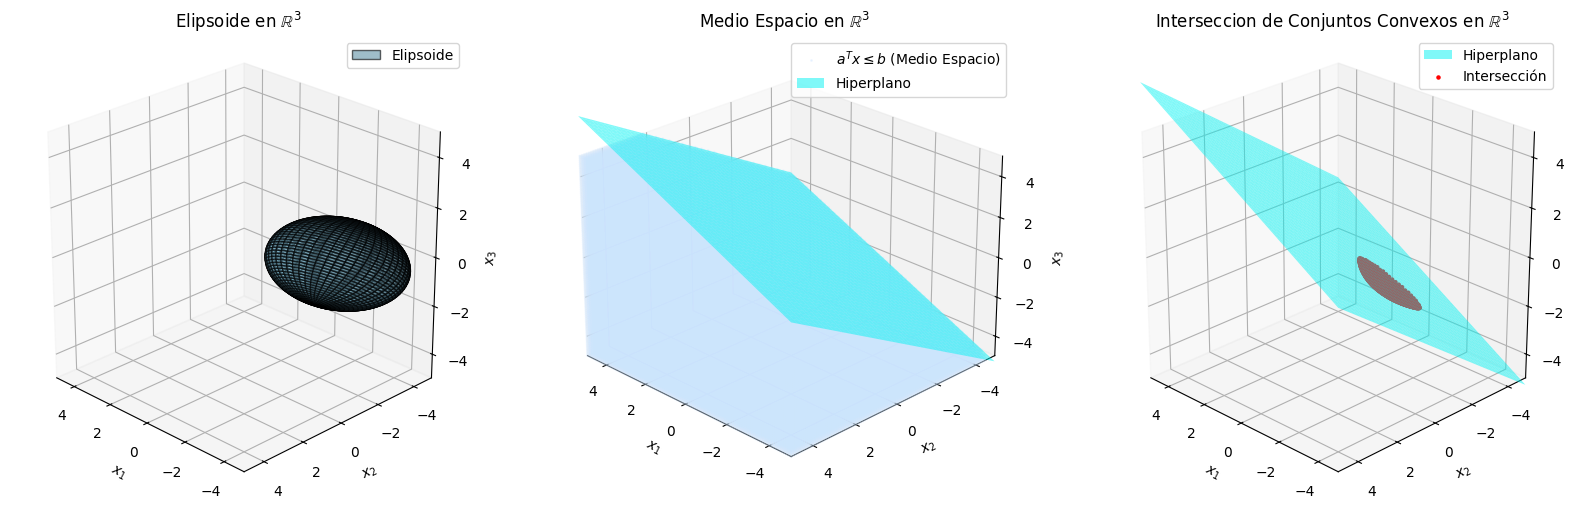

In [3]:
# Definimos la Matriz P (Simétrica, Definida Positiva)

P = np.array([[3, 2, 2], [1, 5, 2], [1, 1, 4]])

# Calculamos los Eigenvalores y los Eigenvectores

eigenvalues, eigenvectors = np.linalg.eig(P)

# Creamos los Puntos de la Bola Unitaria

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

points = np.vstack((x.flatten(), y.flatten(), z.flatten()))

# Transformamos los Puntos de la Bola Unitaria a un Elipsoide, utilizando la matriz P

transform = eigenvectors @ np.diag(np.sqrt(eigenvalues))
elipsoide = transform @ points

# Trasladamos el elipsoide al centro xc

xc = np.random.uniform(-3, 3, size = (3,))

elipsoide[0, :] += xc[0]
elipsoide[1, :] += xc[1]
elipsoide[2, :] += xc[2]

# Definimos el Vector Normal al Hiperplano y el Resultado del producto Interno

a = np.array([-1.35967376, -1.66051791,  2.47237008])
b = 2

# Obtenemos el Hiperplano

x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x_vals, y_vals)

Z = (b - a[0]*X - a[1]*Y) / a[2]

# Obtenemos los Puntos Solucion del Medio Espacio

mesh = np.linspace(-5, 5, 100)
xx, yy, zz = np.meshgrid(mesh, mesh, mesh)

product = a[0]*xx + a[1]*yy + a[2]*zz
mask = product <= b

# Punto más cercano al origen sobre el hiperplano

x0 = (b / np.dot(a, a)) * a

# Interceptamos los Dominios

elip_points = elipsoide.T 
prod = elip_points @ a 
mask_elip = prod <= b  

# Visualizamos

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(1, 3, 1, projection = '3d')
ax2 = fig.add_subplot(1, 3, 2, projection = '3d')
ax3 = fig.add_subplot(1, 3, 3, projection = '3d')

ax1.plot_surface(elipsoide[0, :].reshape(theta.shape), elipsoide[1, :].reshape(theta.shape), elipsoide[2, :].reshape(theta.shape), color = 'skyblue', alpha = 0.6, edgecolor = 'k', label = 'Elipsoide')

ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$x_3$')
ax1.set_title('Elipsoide en $\mathbb{R}^3$')
ax1.grid(True)
ax1.set_box_aspect([1, 1, 1])
ax1.view_init(elev = 25, azim = 135)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)
ax1.set_zlim(-5, 5)
ax1.legend()

ax2.scatter(xx[mask], yy[mask], zz[mask], color = '#cce5ff', s = 1, alpha = 0.3, label = r'$a^T x \leq b$ (Medio Espacio)')
ax2.plot_surface(X, Y, Z, alpha = 0.5, color = 'cyan', edgecolor = 'none', label = r'Hiperplano')

ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)
ax2.set_zlim(-5, 5)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$x_3$')
ax2.set_title('Medio Espacio en $\mathbb{R}^3$')
ax2.view_init(elev = 25, azim = 135)
ax2.grid(True)
ax2.legend()

ax3.plot_surface(X, Y, Z, alpha = 0.5, color = 'cyan', edgecolor = 'none', label = r'Hiperplano')
ax3.scatter(elip_points[mask_elip, 0], elip_points[mask_elip, 1], elip_points[mask_elip, 2], color = 'red', s = 5, alpha = 1, label = 'Intersección')

ax3.set_xlim(-5, 5)
ax3.set_ylim(-5, 5)
ax3.set_zlim(-5, 5)
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_zlabel('$x_3$')
ax3.set_title('Interseccion de Conjuntos Convexos en $\mathbb{R}^3$')
ax3.grid(True)
ax3.legend()
ax3.set_box_aspect([1, 1, 1])
ax3.view_init(elev = 25, azim = 135)

plt.show()

# **Funciones Afines**

Dado un **conjunto convexo** $S \subseteq \mathbb{R}^n$ y una **función afín** $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$, se cumple que la **imagen** de $S$ bajo $f$ también es un **conjunto convexo**:

$$
f(S) = \{ f(x) \mid x \in S \}$$

Además, si $ C \subseteq \mathbb{R}^m $ es un **conjunto convexo**, entonces la **imagen inversa** (preimagen) de $C$ bajo $f$ también es un conjunto convexo:

$$f^{-1}(C) = \{ x \mid f(x) \in C \}$$


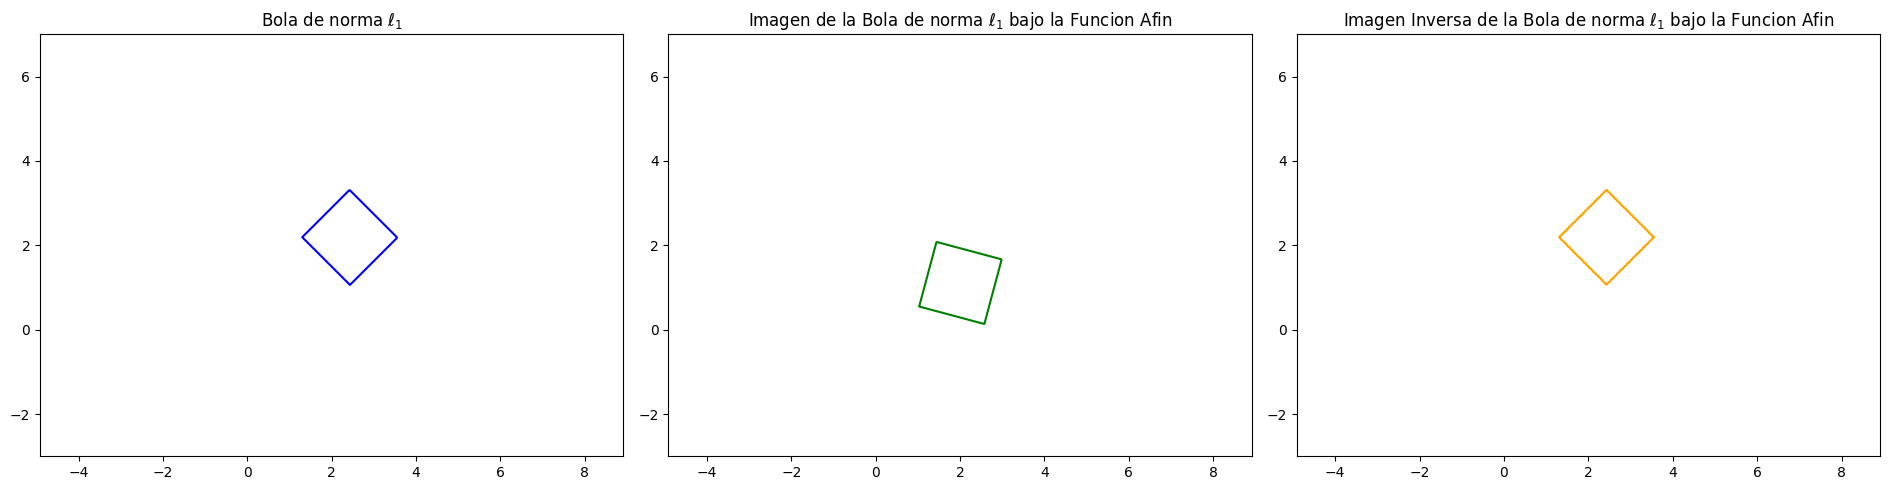

In [4]:
# Definimos el Centro y el Radio de la Bola

xc = np.random.uniform(0, 6, size=(1, 2))[0]
r = np.random.uniform(0.1, 3, size=(1))[0]

# Creamos los Puntos de la Bola

x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)

# Definimos la Normal L1

B1 = np.abs(X - xc[0]) + np.abs(Y - xc[1]) <= r

# Definimos la Funcion Afin

theta = np.pi / 6

R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
b = np.array([1, -2])    

# Obtenemos la Imagen del Conjunto Convexo bajo la Funcio Afin

original_x = np.stack([X.ravel(), Y.ravel()], axis = 1)

image_x = original_x @ R.T + b

X_image = image_x[:, 0].reshape(X.shape)
Y_image = image_x[:, 1].reshape(Y.shape)

B1_image = np.abs(X_image - xc[0]) + np.abs(Y_image - xc[1]) <= r

# Obtenemos la Inversa de la Imagen del Conjunto Convexo bajo la Funcio Afin

image_inv_x = np.vstack([X_image.ravel(), Y_image.ravel()]).T

R_inv = R.T
inverse_image_x = np.dot(image_inv_x - b, R_inv)

X_inv_image = inverse_image_x[:, 0].reshape(X_image.shape)
Y_inv_image = inverse_image_x[:, 1].reshape(Y_image.shape) 

B1_inv_image = np.abs(X_inv_image - xc[0]) + np.abs(Y_inv_image - xc[1]) <= r

# Visualizamos

fig, axs = plt.subplots(1, 3, figsize = (19, 5))

axs[0].contour(X, Y, B1, colors = 'blue')
axs[0].set_title(r'Bola de norma $\ell_1$')
axs[0].axis("equal")
axs[0].set_xlim(-3, 7)
axs[0].set_ylim(-3, 7)

axs[1].contour(X_image, Y_image, B1, colors = 'green')
axs[1].set_title(r'Imagen de la Bola de norma $\ell_1$ bajo la Funcion Afin')
axs[1].axis("equal")
axs[1].set_xlim(-3, 7)
axs[1].set_ylim(-3, 7)

axs[2].contour(X_inv_image, Y_inv_image, B1_inv_image, colors = 'orange')
axs[2].set_title(r'Imagen Inversa de la Bola de norma $\ell_1$ bajo la Funcion Afin')
axs[2].axis("equal")
axs[2].set_xlim(-3, 7)
axs[2].set_ylim(-3, 7)

plt.tight_layout()
plt.show()

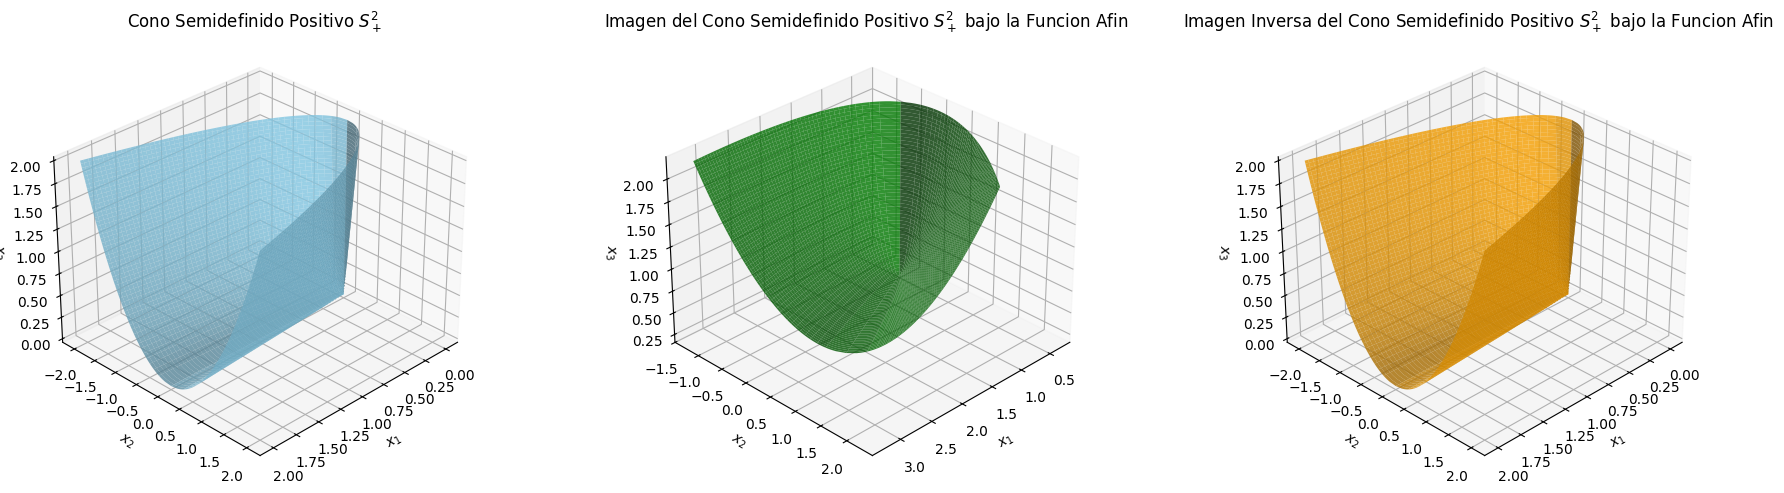

In [5]:
# Creamos los Puntos del Cono Positivo Semidefinido

x = np.linspace(0, 2, 200)
z = np.linspace(0, 2, 200)
X, Z = np.meshgrid(x, z)

Y_pos = np.sqrt(X * Z)
Y_neg = -np.sqrt(X * Z)

# Definimos la Funcion Afin

theta = np.pi / 6

R = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0],  [0, 0, 1]])
b = np.array([0.5, -0.5, 0.2])

# Obtenemos la Imagen del Conjunto Convexo bajo la Funcio Afin

points = np.stack([X.ravel(), Y_pos.ravel(), Z.ravel()], axis = 1)
points_neg = np.stack([X.ravel(), Y_neg.ravel(), Z.ravel()], axis = 1)

transformed_points = points @ R.T + b
transformed_points_neg = points_neg @ R.T + b

X_trans = transformed_points[:, 0].reshape(X.shape)
Y_trans = transformed_points[:, 1].reshape(X.shape)
Z_trans = transformed_points[:, 2].reshape(X.shape)

X_trans_neg = transformed_points_neg[:, 0].reshape(X.shape)
Y_trans_neg = transformed_points_neg[:, 1].reshape(X.shape)
Z_trans_neg = transformed_points_neg[:, 2].reshape(X.shape)

# Obtenemos la Inversa de la Imagen del Conjunto Convexo bajo la Funcio Afin

R_inv = np.linalg.inv(R)

inv_points = (transformed_points - b) @ R_inv.T
inv_points_neg = (transformed_points_neg - b) @ R_inv.T

X_inv = inv_points[:, 0].reshape(X.shape)
Y_inv = inv_points[:, 1].reshape(X.shape)
Z_inv = inv_points[:, 2].reshape(X.shape)

X_inv_neg = inv_points_neg[:, 0].reshape(X.shape)
Y_inv_neg = inv_points_neg[:, 1].reshape(X.shape)
Z_inv_neg = inv_points_neg[:, 2].reshape(X.shape)

# Visualizamos

fig = plt.figure(figsize = (19, 5))

ax1 = fig.add_subplot(131, projection = '3d')
ax2 = fig.add_subplot(132, projection = '3d')
ax3 = fig.add_subplot(133, projection = '3d')

ax1.plot_surface(X, Y_pos, Z, color = 'skyblue', alpha = 0.8, edgecolor = 'none')
ax1.plot_surface(X, Y_neg, Z, color = 'skyblue', alpha = 0.8, edgecolor = 'none')
ax1.set_title('Cono Semidefinido Positivo $S^2_+$')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$x_3$')
ax1.view_init(elev = 30, azim = 45)

ax2.plot_surface(X_trans, Y_trans, Z_trans, color = 'green', alpha = 0.8, edgecolor = 'none')
ax2.plot_surface(X_trans_neg, Y_trans_neg, Z_trans_neg, color = 'green', alpha = 0.8, edgecolor = 'none')
ax2.set_title('Imagen del Cono Semidefinido Positivo $S^2_+$ bajo la Funcion Afin')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$x_3$')
ax2.view_init(elev = 30, azim = 45)


ax3.plot_surface(X_inv, Y_inv, Z_inv, color = 'orange', alpha = 0.8, edgecolor = 'none')
ax3.plot_surface(X_inv_neg, Y_inv_neg, Z_inv_neg, color = 'orange', alpha = 0.8, edgecolor = 'none')
ax3.set_title('Imagen Inversa del Cono Semidefinido Positivo $S^2_+$ bajo la Funcion Afin')
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_zlabel('$x_3$')
ax3.view_init(elev = 30, azim = 45)

plt.tight_layout()
plt.show()


# **Funcion Perspectiva** 

Una **funcion perspectiva** $P: \mathbb{R}^{n+1} \rightarrow \mathbb{R}^n$ se define como: 

$$P(z, t) = \frac{z}{t} \hspace{0.8cm} t > 0$$

Sea un **Conjunto Convexo** $S \subseteq \text{dom} \hspace{0.1cm} P$  y una **funcion perspectiva** $P: \mathbb{R}^{n+1} \rightarrow \mathbb{R}^n$, se cumple que la **imagen** de $S$ bajo $P$ tambien es un **conjunto convexo**. 

$$P(S) = \{P(z, t) \hspace{0.1cm}|\hspace{0.05cm} (z, t) \in S\}$$

Además, si $ C \subseteq \mathbb{R}^n $ es un **conjunto convexo**, entonces la **imagen inversa** (preimagen) de $C$ bajo $P$ también es un conjunto convexo:

$$P^{-1}(C) = \{(z, t) \hspace{0.1cm}|\hspace{0.05cm} P(z, t) \in C\}$$

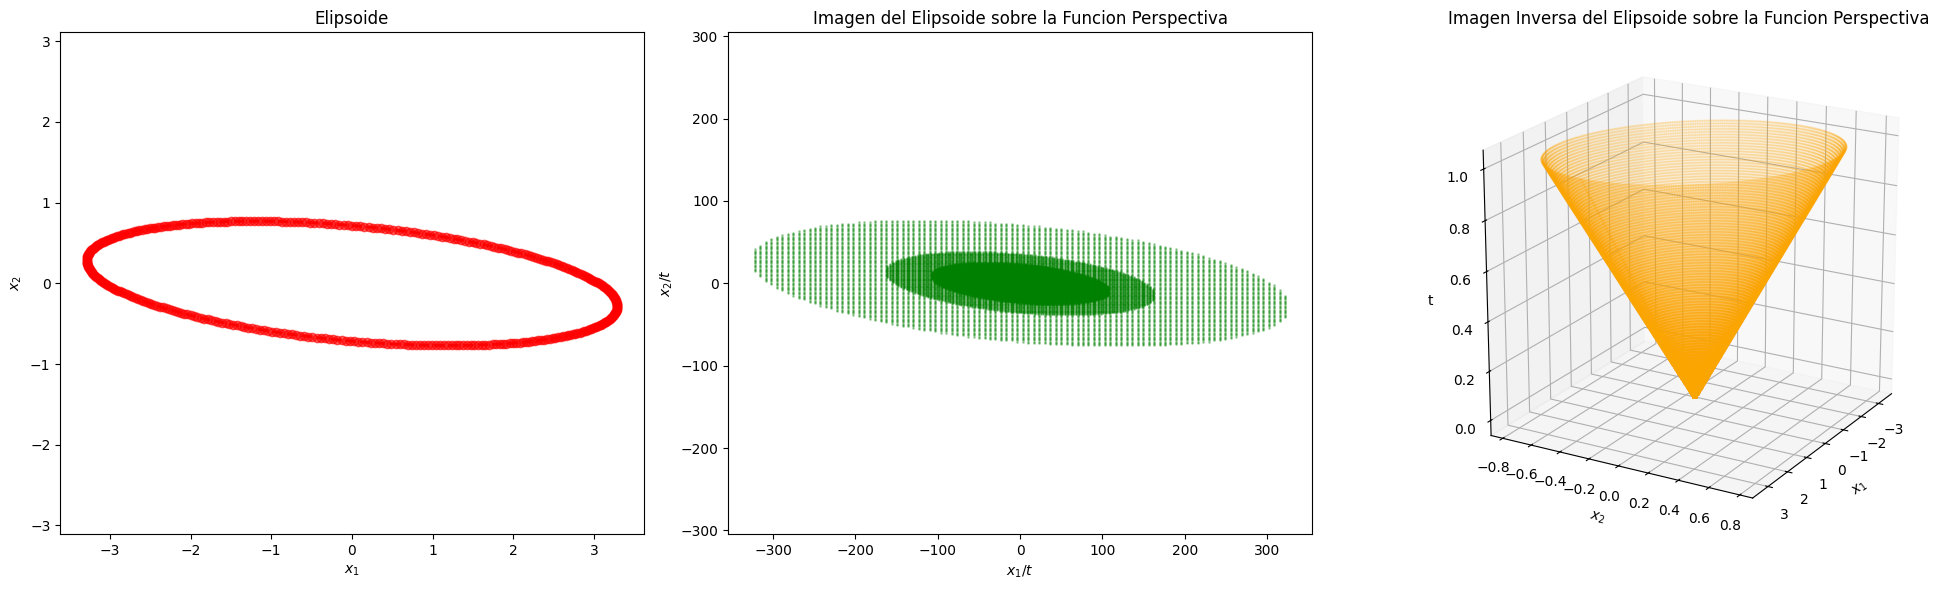

In [6]:
# Definimos la Matriz P (Simetrica, Definida Positiva)

A = np.random.uniform(-3, 3, size = (2, 2))
P = np.transpose(A) @ A 

# Calculamos los Eigenvalores y los Eigenvectores

eigenvalues, eigenvectors = np.linalg.eig(P)

# Creamos los Puntos de la Bola Unitaria

theta = np.linspace(0, 2 * np.pi, 400)
x = np.cos(theta)
y = np.sin(theta)

# Transformamos los Puntos de la Bola Unitaria a un Elipsoide, utilizando la matriz P

elipsoide_x = eigenvectors[0, 0] * np.sqrt(eigenvalues[0]) * x + eigenvectors[0, 1] * np.sqrt(eigenvalues[1]) * y
elipsoide_y = eigenvectors[1, 0] * np.sqrt(eigenvalues[0]) * x + eigenvectors[1, 1] * np.sqrt(eigenvalues[1]) * y

elipsoide_points = np.vstack([elipsoide_x, elipsoide_y]).T

# Calculamos el Casco Convexo del Elipsoide

elipsoide_hull = ConvexHull(elipsoide_points)

# Generamos los Puntos que esten dentro del Elipsoide

x_grid = np.linspace(elipsoide_x.min(), elipsoide_x.max(), 100)
y_grid = np.linspace(elipsoide_y.min(), elipsoide_y.max(), 100)

X, Y = np.meshgrid(x_grid, y_grid)
grid_z = np.stack([X.ravel(), Y.ravel()], axis = 1)

delaunay = Delaunay(elipsoide_points[elipsoide_hull.vertices])
mask = delaunay.find_simplex(grid_z) >= 0
z_in_hull = grid_z[mask]

# Definimos los Valores de t > 0

t_vals = np.linspace(0.01, 1.0, 100)
Z = np.repeat(z_in_hull, len(t_vals), axis = 0)
T = np.tile(t_vals, len(z_in_hull)).reshape(-1, 1)

# Obtenemos la Imagen del Conjunto Convexo bajo la Funcion Perspectiva

perspective = Z / T

# Obtenemos la Imagen Inversa del Conjunto Convexo bajo la Funcion Perspectiva

cone_points = []
for t in t_vals:
    scaled = elipsoide_points * t 
    t_column = np.full((scaled.shape[0], 1), t)
    cone_points.append(np.hstack([scaled, t_column]))

cone_points = np.vstack(cone_points)

# Visualizamos

fig = plt.figure(figsize = (20, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133, projection = '3d')

ax1.plot(elipsoide_points[elipsoide_hull.vertices, 0], elipsoide_points[elipsoide_hull.vertices, 1], 'r--', lw = 2)
ax1.scatter(elipsoide_points[:, 0], elipsoide_points[:, 1], c = 'red', alpha = 0.6)
ax1.set_title('Elipsoide')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.axis("equal")

ax2.scatter(perspective[:, 0], perspective[:, 1], c = 'green', alpha = 0.3, s = 1)
ax2.set_title('Imagen del Elipsoide sobre la Funcion Perspectiva')
ax2.set_xlabel('$x_1 / t$')
ax2.set_ylabel('$x_2 / t$')
ax2.axis("equal")

ax3.scatter(cone_points[:, 0], cone_points[:, 1], cone_points[:, 2], c = 'orange', alpha = 0.2, s = 1)
ax3.set_title('Imagen Inversa del Elipsoide sobre la Funcion Perspectiva')
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_zlabel("t")
ax3.view_init(elev = 20, azim = 30)
ax3.set_box_aspect([1, 1, 1])

plt.tight_layout()

plt.show()

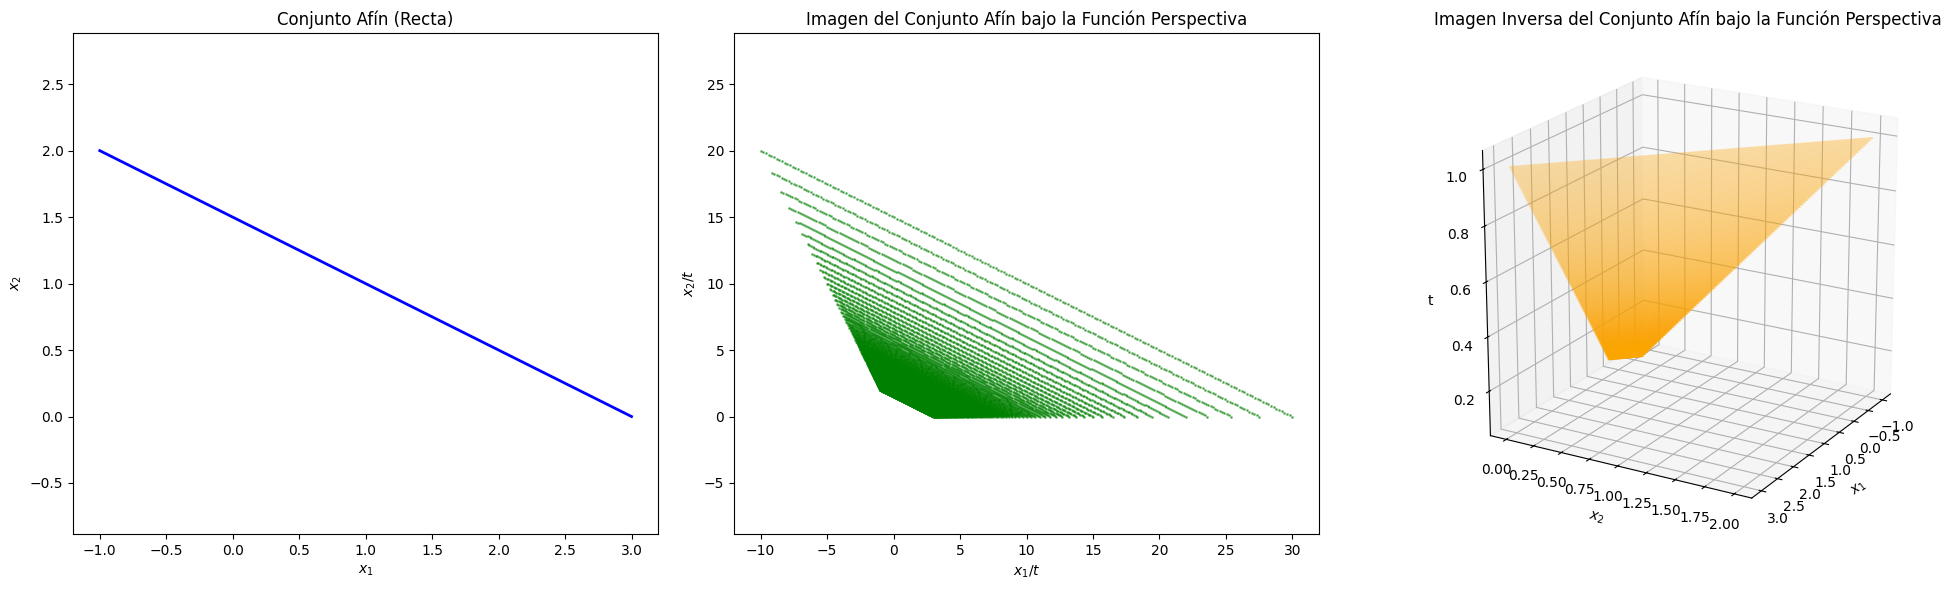

In [7]:
# Definimos un Conjunto Afin

p = np.array([1.0, 1.0])
v = np.array([2.0, -1.0])
t_line = np.linspace(-1, 1, 200)
line_points = np.array([p + t * v for t in t_line])

# Definimos los Valores de t > 0

t_vals = np.linspace(0.1, 1.0, 100)

Z = np.repeat(line_points, len(t_vals), axis = 0)
T = np.tile(t_vals, len(line_points)).reshape(-1, 1)

# Obtenemos la Imagen del Conjunto Convexo bajo la Funcion Perspectiva

perspective = Z / T

# Obtenemos la Imagen Inversa del Conjunto Convexo bajo la Funcion Perspectiva

cone_points = []
for t in t_vals:
    scaled = line_points * t
    t_column = np.full((scaled.shape[0], 1), t)
    cone_points.append(np.hstack([scaled, t_column]))

cone_points = np.vstack(cone_points)

# Visualizamos

fig = plt.figure(figsize = (20, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133, projection = '3d')

ax1.plot(line_points[:, 0], line_points[:, 1], 'b-', lw = 2)
ax1.set_title('Conjunto Afín (Recta)')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.axis("equal")

ax2.scatter(perspective[:, 0], perspective[:, 1], c = 'green', alpha = 0.5, s = 1)
ax2.set_title('Imagen del Conjunto Afín bajo la Función Perspectiva')
ax2.set_xlabel('$x_1 / t$')
ax2.set_ylabel('$x_2 / t$')
ax2.axis("equal")

ax3.scatter(cone_points[:, 0], cone_points[:, 1], cone_points[:, 2], c = 'orange', alpha = 0.2, s = 1)
ax3.set_title('Imagen Inversa del Conjunto Afín bajo la Función Perspectiva')
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_zlabel("t")
ax3.view_init(elev = 20, azim = 30)
ax3.set_box_aspect([1, 1, 1])

plt.tight_layout()
plt.show()
